In [0]:
import nltk
nltk.download('wordnet')

##from google.colab import files
#uploaded = files.upload()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import pandas as pd
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score
import seaborn as sns
import sklearn

In [0]:
df = pd.read_excel("LastYearData.xlsx", sheet_name=None, ignore_index=True, sort=True)
data = pd.concat(df.values(), ignore_index=True, sort=False)

In [0]:
data.isna().sum()

Unnamed: 0    0
Tweet_text    0
Tag           0
dtype: int64

In [0]:
data['Tag'].value_counts()

ST    450
ED    364
SP    316
EN    262
NW    192
RE    156
HT    151
BN    141
WB    120
SI    114
PT     98
GM     15
Name: Tag, dtype: int64

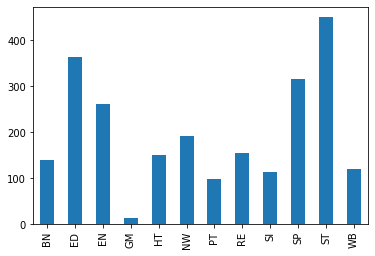

In [0]:
data['Tag'].value_counts().sort_index().plot.bar()

In [0]:
data['Tag'].describe()

count     2379
unique      12
top         ST
freq       450
Name: Tag, dtype: object

In [0]:
data.head()

Unnamed: 0                                         Tweet_text Tag
0           0  "In any given moment we have two options: to s...  WB
1           1  "A stumble may prevent a fall." â€”@@gretchenr...  WB
2           2  Real world development is nothing like a Unive...  ST
3           3  "Act as if what you do makes a difference. It ...  WB
4           4  https://t.co/L7ruOHYhQj\nReinforcement learnin...  ST

In [0]:
data.shape

(2379, 3)

In [0]:
my_tags = ['ST', 'PT', 'HT', 'BN', 'ED', 'SP', 'EN', 'SI', 'RE', 'GM', 'NW', 'WB']

In [0]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text_to_preprocess):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text_to_preprocess, pos='v'))

def preprocess(text_to_preprocess):
    result = []
    for token in gensim.utils.simple_preprocess(text_to_preprocess):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return " ".join(result)

In [0]:
data['Tweet_text'] = data['Tweet_text'].map(preprocess)


In [0]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(data['Tweet_text'], data['Tag'], stratify=data['Tag'],random_state = 0)

In [0]:
print("train_x shape",train_x.shape)
print("train_y shape",train_y.shape)
print("test_x shape",test_x.shape)
print("test_y shape",test_y.shape)

train_x shape (1784,)
train_y shape (1784,)
test_x shape (595,)
test_y shape (595,)


In [0]:
col=['Tag']
train_y = pd.DataFrame(train_y)
train_y['Tag'].value_counts()

ST    337
ED    273
SP    237
EN    196
NW    144
RE    117
HT    113
BN    106
WB     90
SI     86
PT     74
GM     11
Name: Tag, dtype: int64

In [0]:
col=['Tag']
test_y = pd.DataFrame(test_y)
test_y['Tag'].value_counts()

ST    113
ED     91
SP     79
EN     66
NW     48
RE     39
HT     38
BN     35
WB     30
SI     28
PT     24
GM      4
Name: Tag, dtype: int64

In [0]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y.values)
test_y = encoder.fit_transform(test_y.values)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(data['Tweet_text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
                vocabulary=None)

In [0]:
# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xtest_count =  count_vect.transform(test_x)

In [0]:
def train_model(clf, x_train, y_train, x_test, y_test, verbose=False):
    clf = clf.fit(x_train, y_train)    
    pred = clf.predict(x_test)    
    
    if verbose:
        tweet = "Sanju Movie was fantastic"
        print("Predicting tweet: {}".format(tweet))
        custom_pred = clf.predict(count_vect.transform([tweet]))
        print("Result: {}".format(encoder.inverse_transform(custom_pred)))
    
    return metrics.accuracy_score(pred, y_test)

In [0]:
def formatAccuracy(acc):
    return round(acc*100, 3)

~ Using Naive Bayes ~ 
Predicting tweet: Sanju Movie was fantastic
Result: ['ST']
Accuracy: 65.21%
              precision    recall  f1-score   support

          ST       0.69      0.69      0.69        35
          PT       0.72      0.69      0.70        91
          HT       0.61      0.59      0.60        66
          BN       0.04      0.25      0.07         4
          ED       0.69      0.92      0.79        38
          SP       0.65      0.46      0.54        48
          EN       0.61      0.58      0.60        24
          SI       0.80      0.82      0.81        39
          RE       0.48      0.54      0.51        28
          GM       0.93      0.78      0.85        79
          NW       0.67      0.58      0.62       113
          WB       0.38      0.50      0.43        30

    accuracy                           0.65       595
   macro avg       0.60      0.62      0.60       595
weighted avg       0.68      0.65      0.66       595

roc_auc_score : 0.7925696501881853

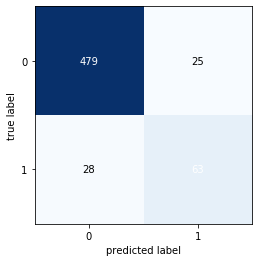

In [0]:
print ("~ Using Naive Bayes ~ ")
NBModel = naive_bayes.MultinomialNB(alpha=0.1)
accuracyNB = train_model(NBModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyNB)))
NBModel = NBModel.fit(xtrain_count, train_y) 
pred = NBModel.predict(xtest_count)
print(classification_report(test_y, pred,target_names=my_tags))
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
train_acc= accuracy_score(train_y, NBModel.predict(xtrain_count))
print("Train acc",train_acc)
print("Train acc",NBModel.score(xtrain_count,train_y))

import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()



In [0]:
#SVC
print()
print ("~ Using Linear SVC ~ ")
SVCModel = svm.LinearSVC(C=0.1)
accuracySVC = train_model(SVCModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracySVC)))
SVCModel = SVCModel.fit(xtrain_count, train_y) 
pred = SVCModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
train_acc= accuracy_score(train_y, SVCModel.predict(xtrain_count))
print("Train acc :",train_acc)
print("Train acc :",train_acc)
print(classification_report(test_y, pred,target_names=my_tags))


~ Using Linear SVC ~ 
Predicting tweet: Sanju Movie was fantastic
Result: ['EN']
Accuracy: 70.588%
roc_auc_score : 0.7986976643800189
Train acc : 0.9882286995515696
Train acc : 0.9882286995515696
              precision    recall  f1-score   support

          ST       0.88      0.66      0.75        35
          PT       0.72      0.75      0.73        91
          HT       0.54      0.56      0.55        66
          BN       0.00      0.00      0.00         4
          ED       0.90      0.95      0.92        38
          SP       0.61      0.52      0.56        48
          EN       0.71      0.50      0.59        24
          SI       0.87      0.87      0.87        39
          RE       0.82      0.50      0.62        28
          GM       0.92      0.84      0.87        79
          NW       0.57      0.77      0.65       113
          WB       0.69      0.60      0.64        30

    accuracy                           0.71       595
   macro avg       0.69      0.63      0.65  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC


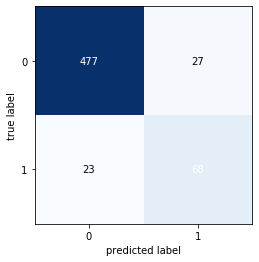

In [0]:
print('SVC')

cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)


fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()



In [0]:
#LR
print()
print ("~ Using Logistic Regression ~ ")
LRModel = linear_model.LogisticRegression(C=1.0, solver='lbfgs', multi_class='multinomial')
accuracySVC = train_model(LRModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracySVC)))
LRModel = LRModel.fit(xtrain_count, train_y) 
pred = LRModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
train_acc= accuracy_score(train_y, LRModel.predict(xtrain_count))
print("Train acc :",train_acc)
print(classification_report(test_y, pred,target_names=my_tags))


~ Using Logistic Regression ~ 
Predicting tweet: Sanju Movie was fantastic
Result: ['EN']
Accuracy: 70.084%
roc_auc_score : 0.7960044703036355
Train acc : 0.9876681614349776
              precision    recall  f1-score   support

          ST       0.88      0.60      0.71        35
          PT       0.70      0.70      0.70        91
          HT       0.52      0.61      0.56        66
          BN       0.00      0.00      0.00         4
          ED       0.95      0.92      0.93        38
          SP       0.64      0.44      0.52        48
          EN       0.72      0.54      0.62        24
          SI       0.92      0.87      0.89        39
          RE       0.93      0.50      0.65        28
          GM       0.94      0.86      0.90        79
          NW       0.54      0.78      0.64       113
          WB       0.73      0.63      0.68        30

    accuracy                           0.70       595
   macro avg       0.70      0.62      0.65       595
weighted avg 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


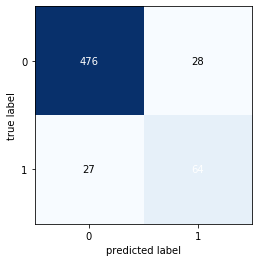

In [0]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()



In [0]:
#RF
print()
print ("~ Using Random Forest Classifier ~")
RFModel = RandomForestClassifier(n_estimators=500, max_depth=200, random_state=0)
accuracyRF = train_model(RFModel,xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyRF)))
RFModel = RFModel.fit(xtrain_count, train_y) 
pred = RFModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
train_acc= accuracy_score(train_y, RFModel.predict(xtrain_count))
print('train_acc',train_acc)
print(classification_report(test_y, pred,target_names=my_tags))


~ Using Random Forest Classifier ~
Predicting tweet: Sanju Movie was fantastic
Result: ['ST']
Accuracy: 69.748%
roc_auc_score : 0.7931163073848766
train_acc 0.9960762331838565
              precision    recall  f1-score   support

          ST       0.92      0.63      0.75        35
          PT       0.69      0.74      0.71        91
          HT       0.66      0.47      0.55        66
          BN       0.00      0.00      0.00         4
          ED       0.90      0.95      0.92        38
          SP       0.78      0.29      0.42        48
          EN       0.76      0.54      0.63        24
          SI       0.95      0.92      0.94        39
          RE       0.94      0.61      0.74        28
          GM       0.93      0.82      0.87        79
          NW       0.49      0.86      0.63       113
          WB       0.61      0.57      0.59        30

    accuracy                           0.70       595
   macro avg       0.72      0.62      0.65       595
weighted av

GB


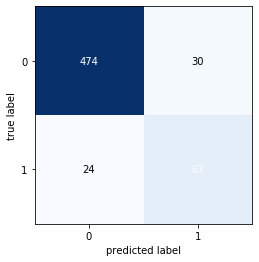

In [0]:
print("GB")
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()



In [0]:
from sklearn.ensemble import GradientBoostingClassifier

print("Gradient boosting")
GB=GradientBoostingClassifier(learning_rate=0.01,max_depth=2,random_state=0)
accuracyGB = train_model(GB,xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyGB)))
GB = GB.fit(xtrain_count, train_y) 
pred = GB.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
train_acc= accuracy_score(train_y, GB.predict(xtrain_count))
print('train_acc',train_acc)
print(classification_report(test_y, pred,target_names=my_tags))


print()
print()

GB=GradientBoostingClassifier(random_state=0)
accuracyGB = train_model(RFModel,xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyRF)))
GB = GB.fit(xtrain_count, train_y) 
pred = GB.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
train_acc= accuracy_score(train_y, GB.predict(xtrain_count))
print('train_acc',train_acc)
print(classification_report(test_y, pred,target_names=my_tags))



Gradient boosting
Predicting tweet: Sanju Movie was fantastic
Result: ['ST']
Accuracy: 60.504%
roc_auc_score : 0.742266270170776
train_acc 0.6401345291479821
              precision    recall  f1-score   support

          ST       0.83      0.57      0.68        35
          PT       0.84      0.54      0.66        91
          HT       0.92      0.33      0.49        66
          BN       0.00      0.00      0.00         4
          ED       0.85      0.92      0.89        38
          SP       0.86      0.12      0.22        48
          EN       0.76      0.54      0.63        24
          SI       0.94      0.82      0.88        39
          RE       1.00      0.39      0.56        28
          GM       1.00      0.62      0.77        79
          NW       0.34      0.96      0.51       113
          WB       1.00      0.47      0.64        30

    accuracy                           0.61       595
   macro avg       0.78      0.52      0.58       595
weighted avg       0.79      0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicting tweet: Sanju Movie was fantastic
Result: ['ST']
Accuracy: 69.748%
roc_auc_score : 0.7756286735177419
train_acc 0.9663677130044843
              precision    recall  f1-score   support

          ST       0.79      0.63      0.70        35
          PT       0.79      0.66      0.72        91
          HT       0.86      0.45      0.59        66
          BN       0.00      0.00      0.00         4
          ED       0.81      0.92      0.86        38
          SP       0.68      0.31      0.43        48
          EN       0.75      0.50      0.60        24
          SI       0.89      0.87      0.88        39
          RE       0.94      0.54      0.68        28
          GM       0.96      0.68      0.80        79
          NW       0.41      0.88      0.56       113
          WB       0.81      0.57      0.67        30

    accuracy                           0.66       595
   macro avg       0.72      0.58      0.63       595
weighted avg       0.75      0.66      0.67    

GB


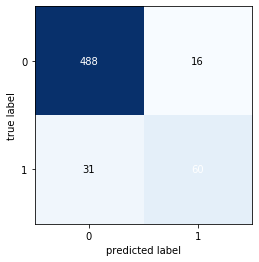

In [0]:
print("GB")
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()




~ Using LDA ~ 


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Predicting tweet: Sanju Movie was fantastic
Result: ['SP']
Accuracy: 42.689%


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


roc_auc_score : 0.6603614559714479
Train_acc 0.9876681614349776
              precision    recall  f1-score   support

          ST       0.75      0.26      0.38        35
          PT       0.63      0.60      0.62        91
          HT       0.49      0.38      0.43        66
          BN       0.00      0.00      0.00         4
          ED       0.42      0.61      0.49        38
          SP       0.71      0.21      0.32        48
          EN       0.11      0.12      0.12        24
          SI       0.81      0.64      0.71        39
          RE       0.31      0.43      0.36        28
          GM       0.21      0.46      0.29        79
          NW       0.62      0.39      0.48       113
          WB       0.35      0.40      0.38        30

    accuracy                           0.43       595
   macro avg       0.45      0.37      0.38       595
weighted avg       0.51      0.43      0.44       595



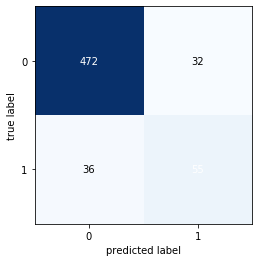

In [0]:
#LDA
print()
print ("~ Using LDA ~ ")
LDAModel = LinearDiscriminantAnalysis()
accuracyLDA = train_model(LDAModel,xtrain_count.toarray(), train_y, xtest_count.toarray(), test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyLDA)))
LDAModel = LDAModel.fit(xtrain_count.toarray(), train_y) 
pred = LDAModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
train_acc= accuracy_score(train_y, LDAModel.predict(xtrain_count))
print("Train_acc",train_acc)
print(classification_report(test_y, pred,target_names=my_tags))
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()




~ Using NN ~ 
Predicting tweet: Sanju Movie was fantastic
Result: ['NW']
Accuracy: 65.378%
roc_auc_score : 0.7912549582809842
train_acc 0.9983183856502242
              precision    recall  f1-score   support

          ST       0.79      0.66      0.72        35
          PT       0.67      0.63      0.65        91
          HT       0.62      0.50      0.55        66
          BN       0.25      0.25      0.25         4
          ED       0.90      0.92      0.91        38
          SP       0.29      0.29      0.29        48
          EN       0.58      0.58      0.58        24
          SI       0.88      0.90      0.89        39
          RE       0.58      0.50      0.54        28
          GM       0.84      0.84      0.84        79
          NW       0.56      0.69      0.62       113
          WB       0.63      0.63      0.63        30

    accuracy                           0.65       595
   macro avg       0.63      0.62      0.62       595
weighted avg       0.66      0.6

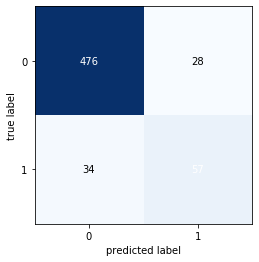

In [0]:
#NN
print()
print ("~ Using NN ~ ")
NNModel = MLPClassifier(activation='relu', max_iter=800, solver='lbfgs', learning_rate_init=0.005, hidden_layer_sizes=(46, 44), random_state=1)
accuracyNN = train_model(NNModel, xtrain_count.toarray(), train_y, xtest_count.toarray(), test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyNN)))
NNModel = NNModel.fit(xtrain_count, train_y) 
pred = NNModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
train_acc= accuracy_score(train_y, NNModel.predict(xtrain_count))
print('train_acc',train_acc)
print(classification_report(test_y, pred,target_names=my_tags))
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()


In [0]:
def majority_voting(x_train, y_train, x_test, y_test):    
    NBPredict = NBModel.predict(x_test)
    SVCPredict = SVCModel.predict(x_test)
    LRPredict = LRModel.predict(x_test)
    RFPredict = RFModel.predict(x_test)
    NNPredict = NNModel.predict(x_test)
    GBPredict = GB.predict(x_test)
#    
    votingPred = []
    
    for i in range(len(y_test)):
        for_pred = [NBPredict[i], LRPredict[i], SVCPredict[i], RFPredict[i], NNPredict[i],GBPredict[i]]
        highest = for_pred[0]
        count = 0
        for current_pred in for_pred: 
            new_count = 0
            for test_pred in for_pred:
                if current_pred == test_pred:
                    new_count = new_count + 1
            if new_count > count:
                highest = current_pred
                count = new_count
        votingPred.append(highest)
           
    return metrics.accuracy_score(votingPred, y_test)

In [0]:
def majorityVotingPredictor(inputX):
    NBPredict = NBModel.predict(count_vect.transform([inputX]))
    SVCPredict = SVCModel.predict(count_vect.transform([inputX]))
    LRPredict = LRModel.predict(count_vect.transform([inputX]))
    RFPredict = RFModel.predict(count_vect.transform([inputX]))
    NNPredict = NNModel.predict(count_vect.transform([inputX]))
    GBPredict = GB.predict(count_vect.transform([inputX]))
    
    print("NB: {}".format(encoder.inverse_transform(NBPredict)))
    print("SVC: {}".format(encoder.inverse_transform(SVCPredict)))
    print("LR: {}".format(encoder.inverse_transform(LRPredict)))
    print("RF: {}".format(encoder.inverse_transform(RFPredict)))
    print("NN: {}".format(encoder.inverse_transform(NNPredict)))
    print("GB: {}".format(encoder.inverse_transform(GBPredict)))
    
    for_pred = [NBPredict, LRPredict, SVCPredict, RFPredict, NNPredict,GBPredict]
    highest = for_pred[0]
    count = 0
    for current_pred in for_pred: 
        new_count = 0
        for test_pred in for_pred:
            if current_pred == test_pred:
                new_count = new_count + 1
        if new_count > count:
            highest = current_pred
            count = new_count
    
    return encoder.inverse_transform(highest)

In [0]:
print()
print ("~ Using Majority Voting ~ ")
votingAccuracy = majority_voting(xtrain_count, train_y, xtest_count, test_y)
print ("Accuracy: {}%".format(formatAccuracy(votingAccuracy)))


~ Using Majority Voting ~ 
Accuracy: 71.597%


In [0]:
custom_input = "The mummy is my favourite movie the songs was amazing"
print("Predicting tweet: {}".format(custom_input))
result = majorityVotingPredictor(preprocess(custom_input))
print("Majority Voting: {}".format(result))

Predicting tweet: The mummy is my favourite movie the songs was amazing
NB: ['EN']
SVC: ['EN']
LR: ['EN']
RF: ['EN']
NN: ['EN']
GB: ['EN']
Majority Voting: ['EN']
